In [129]:
import numpy as np 
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Definition of Lotka-Volterra System 
## Parameters:
- **$x_{0}=[5, 3]$**
- **$\theta = [2, 1, 4, 1]$**
- **$\theta=[\alpha, \beta, \gamma, \delta]$**
- **States: $x(t)=[S, W]$**

In [130]:
def lotka_volterra_system(state, t, alpha, beta, gamma, delta):
    s, w = state
    dsdt = alpha * s - beta * s * w
    dwdt = delta * s * w - gamma * w
    return [dsdt, dwdt]

In [131]:
alpha = 2
beta = 1
gamma = 4
delta = 1
initial_state = [5, 3]

## Time Points

In [132]:
t = np.linspace(0, 2, 200)
print(t.shape)

(200,)


## Solving the system

In [133]:
solution = odeint(lotka_volterra_system, initial_state, t, args=(alpha, beta, gamma, delta))
print(solution.shape)

(200, 2)


## Sampling Time Points

In [134]:
# t_sub = np.arange(0, 2, 0.2)
# index = np.int_((t_sub / 0.01))
# solution_sampling = solution[index]
# print(solution_sampling)
# De manera aleatoria
# rng = np.random.RandomState(1)
# training_index = rng.choice(np.arange(len(solution)), size=10, replace=False)
# t_train, y_train = t[training_index], solution[training_index]
# noise_std = 0.75
# y_train_noisy = y_train + rng.normal(loc=0.0, scale=noise_std, size=y_train.shape)
# # Con saltos de dt=0.2
t_sub = np.arange(0, 2, 0.2)
index = np.int_((t_sub / 0.01))  
t_train = t[index]
y_train = solution[index] 
noise_std = 0.075
y_train_noisy = y_train + np.random.normal(loc=0.0, scale=noise_std, size=y_train.shape)  # Añadir ruido
print("Datos seleccionados (con ruido):", y_train_noisy)



Datos seleccionados (con ruido): [[4.92194534 3.03431177]
 [4.00982972 3.35350574]
 [3.04666526 2.96324022]
 [2.68805233 2.36399852]
 [2.73682391 1.95587062]
 [2.9786254  1.43279927]
 [3.36068312 1.11121604]
 [4.05643133 1.11201407]
 [4.82126112 1.10576021]
 [5.3441677  1.42839493]]


## Plotting

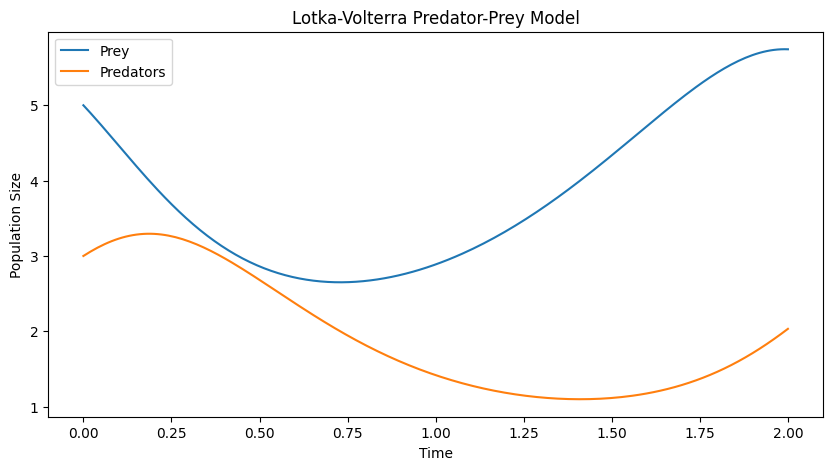

In [135]:
plt.figure(figsize=(10, 5))
plt.plot(t, solution[:, 0], label='Prey')
plt.plot(t, solution[:, 1], label='Predators')
plt.title('Lotka-Volterra Predator-Prey Model')
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.legend()
plt.show()

## GP approach to inference solutions of LV System

In [136]:
T = t_train.reshape(-1, 1)
Y = y_train_noisy
print(T)

[[0.        ]
 [0.20100503]
 [0.40201005]
 [0.60301508]
 [0.8040201 ]
 [1.00502513]
 [1.20603015]
 [1.40703518]
 [1.6080402 ]
 [1.80904523]]


In [137]:
kernel = RBF(length_scale_bounds=(1e-6, np.inf))

In [138]:
gp = GaussianProcessRegressor(kernel=kernel, alpha=noise_std**2)
print(gp)

GaussianProcessRegressor(alpha=0.005625, kernel=RBF(length_scale=1))


In [139]:
gp.fit(T, Y)

GaussianProcessRegressor(alpha=0.005625, kernel=RBF(length_scale=1))

In [140]:
Y_pred, sigma = gp.predict(t.reshape(-1, 1), return_std=True)
print(sigma)

[[0.07120081 0.07120081]
 [0.06792905 0.06792905]
 [0.06512747 0.06512747]
 [0.06277877 0.06277877]
 [0.06085809 0.06085809]
 [0.05933335 0.05933335]
 [0.05816644 0.05816644]
 [0.0573148  0.0573148 ]
 [0.05673348 0.05673348]
 [0.05637712 0.05637712]
 [0.05620182 0.05620182]
 [0.05616657 0.05616657]
 [0.05623424 0.05623424]
 [0.05637217 0.05637217]
 [0.05655238 0.05655238]
 [0.05675148 0.05675148]
 [0.05695046 0.05695046]
 [0.05713429 0.05713429]
 [0.05729152 0.05729152]
 [0.05741385 0.05741385]
 [0.05749573 0.05749573]
 [0.05753394 0.05753394]
 [0.05752724 0.05752724]
 [0.05747605 0.05747605]
 [0.05738215 0.05738215]
 [0.05724842 0.05724842]
 [0.05707861 0.05707861]
 [0.05687712 0.05687712]
 [0.05664882 0.05664882]
 [0.05639887 0.05639887]
 [0.05613256 0.05613256]
 [0.05585519 0.05585519]
 [0.05557194 0.05557194]
 [0.05528775 0.05528775]
 [0.05500725 0.05500725]
 [0.05473463 0.05473463]
 [0.05447362 0.05447362]
 [0.05422744 0.05422744]
 [0.05399874 0.05399874]
 [0.05378957 0.05378957]


Text(0.5, 1.0, 'GP for inferencing solutions of Lotka-Volterra System')

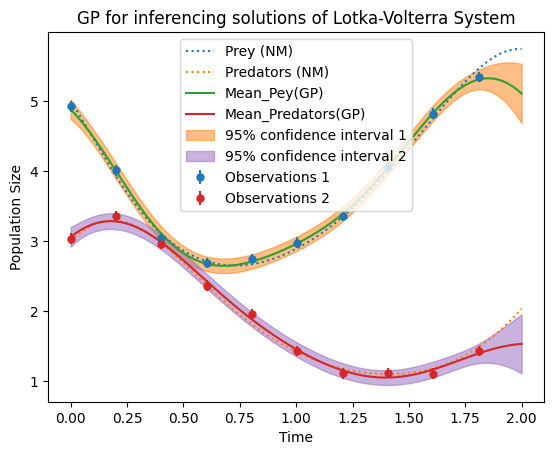

In [141]:
 plt.plot(t, solution, label=['Prey (NM)', 'Predators (NM)'], linestyle='dotted')
 plt.errorbar(t_train, y_train_noisy[:, 0], noise_std, linestyle='None', color='tab:blue', marker='.', markersize=10, label='Observations 1')
 plt.errorbar(t_train, y_train_noisy[:, 1], noise_std, linestyle='None', color='tab:red', marker='.', markersize=10, label='Observations 2')
 plt.plot(t, Y_pred, label=['Mean_Pey(GP)', 'Mean_Predators(GP)'])
 plt.fill_between(t.ravel(), Y_pred[:, 0] - 1.96 * sigma[:, 0], Y_pred[:, 0] + 1.96 * sigma[:, 0], color='tab:orange', alpha=0.5, label=r'95% confidence interval 1')
 plt.fill_between(t.ravel(), Y_pred[:, 1] - 1.96 * sigma[:, 1], Y_pred[:, 1] + 1.96 * sigma[:, 1], color='tab:purple', alpha=0.5, label=r'95% confidence interval 2')
 plt.legend()
 plt.xlabel("Time")
 plt.ylabel("Population Size")
 plt.title("GP for inferencing solutions of Lotka-Volterra System")

## Subplots

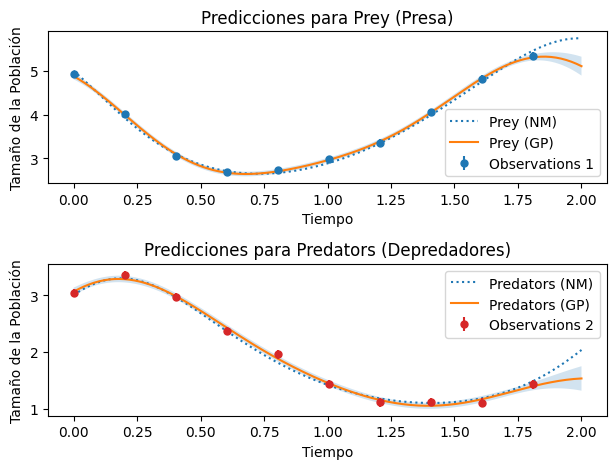

In [142]:
# Suponiendo que Y_pred y sigma están definidos y tienen una longitud de 200
# Redefinimos T para que tenga la misma longitud que Y_pred
# T = np.linspace(0, 10, len(Y_pred))

# Subplot para 'prey'
plt.subplot(2, 1, 1)
plt.plot(t, solution[:, 0], label='Prey (NM)', linestyle='dotted')
plt.errorbar(t_train, y_train_noisy[:, 0], noise_std, linestyle='None', color='tab:blue', marker='.', markersize=10, label='Observations 1')
plt.plot(t, Y_pred[:, 0], label='Prey (GP)')
plt.fill_between(t, Y_pred[:, 0] - sigma[:, 0], Y_pred[:, 0] + sigma[:, 0], alpha=0.2)
plt.title('Predicciones para Prey (Presa)')
plt.xlabel('Tiempo')
plt.ylabel('Tamaño de la Población')
plt.legend()

# Subplot para 'predators'
plt.subplot(2, 1, 2)
plt.plot(t, solution[:, 1], label='Predators (NM)', linestyle='dotted')
plt.plot(t, Y_pred[:, 1], label='Predators (GP)')
plt.errorbar(t_train, y_train_noisy[:, 1], noise_std, linestyle='None', color='tab:red', marker='.', markersize=10, label='Observations 2')
plt.fill_between(t, Y_pred[:, 1] - sigma[:, 1], Y_pred[:, 1] + sigma[:, 1], alpha=0.2)
plt.title('Predicciones para Predators (Depredadores)')
plt.xlabel('Tiempo')
plt.ylabel('Tamaño de la Población')
plt.legend()

plt.tight_layout()
plt.show()




## Probabilistic Solutions 

## Parameters 

In [143]:
import sys
sys.path.append('D:/Users/Roberth/Desktop/B_P')
import GP_B as gp1

In [152]:
a = 0
b = 2
N = 1000
ND = 200
la = 2*(b-a) / (N-1)
alpha = N
u0 = np.array([[5, 3]]).T # [5, 3]
p = np.array([[2.0, 1.0, 4.0, 1.0]]).T # [2, 1, 4, 1]
t1 = np.reshape(np.linspace(a, b, ND), (1, ND)).T 

## Function LV
- u[0, 0] = S
- u[1, 0] = W

In [153]:
def lotka_volterra(u, p):
    f1 = p[0, 0] * u[0, 0] - p[1, 0] * u[0, 0] * u[1, 0]
    f2 = p[3, 0] * u[0, 0] * u[1, 0] - p[2, 0] * u[1, 0]
    f = np.array([[f1, f2]])
    return f

In [154]:
M, C = gp1.gp_odes(a, b, ND, N, la, alpha, lotka_volterra, u0, p, t1)
print(M)

[[5.         3.        ]
 [4.94982306 3.02928528]
 [4.90018546 3.05654867]
 [4.84982023 3.08255399]
 [4.79878071 3.10726624]
 [4.74717155 3.13062476]
 [4.6950857  3.15257976]
 [4.64261534 3.17308586]
 [4.58985023 3.19210243]
 [4.53688112 3.2095929 ]
 [4.48379571 3.22552642]
 [4.43067969 3.239876  ]
 [4.37761643 3.25262015]
 [4.32468647 3.26374219]
 [4.27196794 3.27323032]
 [4.21953607 3.28107726]
 [4.16746105 3.28728261]
 [4.11581216 3.29184737]
 [4.06465384 3.29478082]
 [4.01404639 3.29609475]
 [3.96404682 3.29580533]
 [3.91470828 3.29393339]
 [3.86608169 3.2905028 ]
 [3.81821246 3.28554202]
 [3.77114139 3.27908261]
 [3.72490834 3.27115909]
 [3.67954706 3.26180963]
 [3.63508948 3.25107417]
 [3.59156382 3.23899382]
 [3.54899468 3.22561473]
 [3.50740419 3.21098228]
 [3.4668113  3.19514511]
 [3.42723062 3.17815247]
 [3.38867416 3.16005521]
 [3.35115449 3.14090451]
 [3.3146799  3.12075053]
 [3.27925627 3.09964737]
 [3.24488595 3.07764704]
 [3.21157174 3.05480197]
 [3.17931365 3.031164  ]


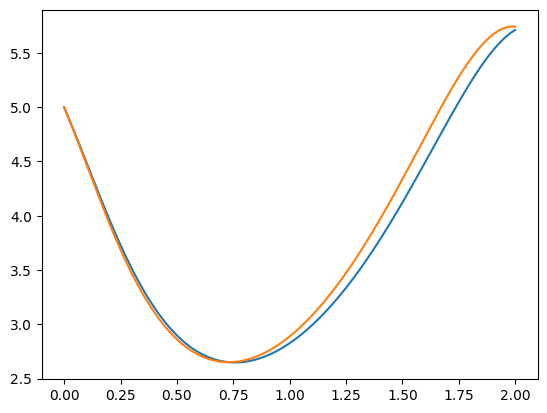

In [155]:
t2 = np.linspace(a, b, ND)
plt.plot(t2, M[:, 0])
plt.plot(t, solution[:, 0])